* This notebook provides a basic exploration of the ASL alphabet classification dataset. 
* The goal is to understand the structure of the dataset, analyze class distributions, and examine the properties of the images.

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

from utils.config import load_config

### Load data paths from config

In [33]:
config = load_config()
train_dir = config['data_paths']['images_raw']

### Class Distribution Analysis

In [11]:
# Basic Dataset Information
classes = os.listdir(train_dir)
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes}

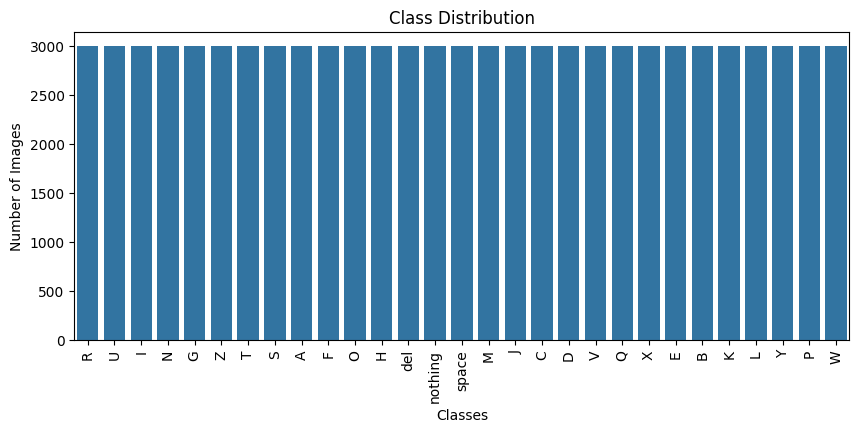

In [13]:
plt.figure(figsize=(10, 4))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.show()

Each class has equal number of images (3000)

### Sample Image Visualization

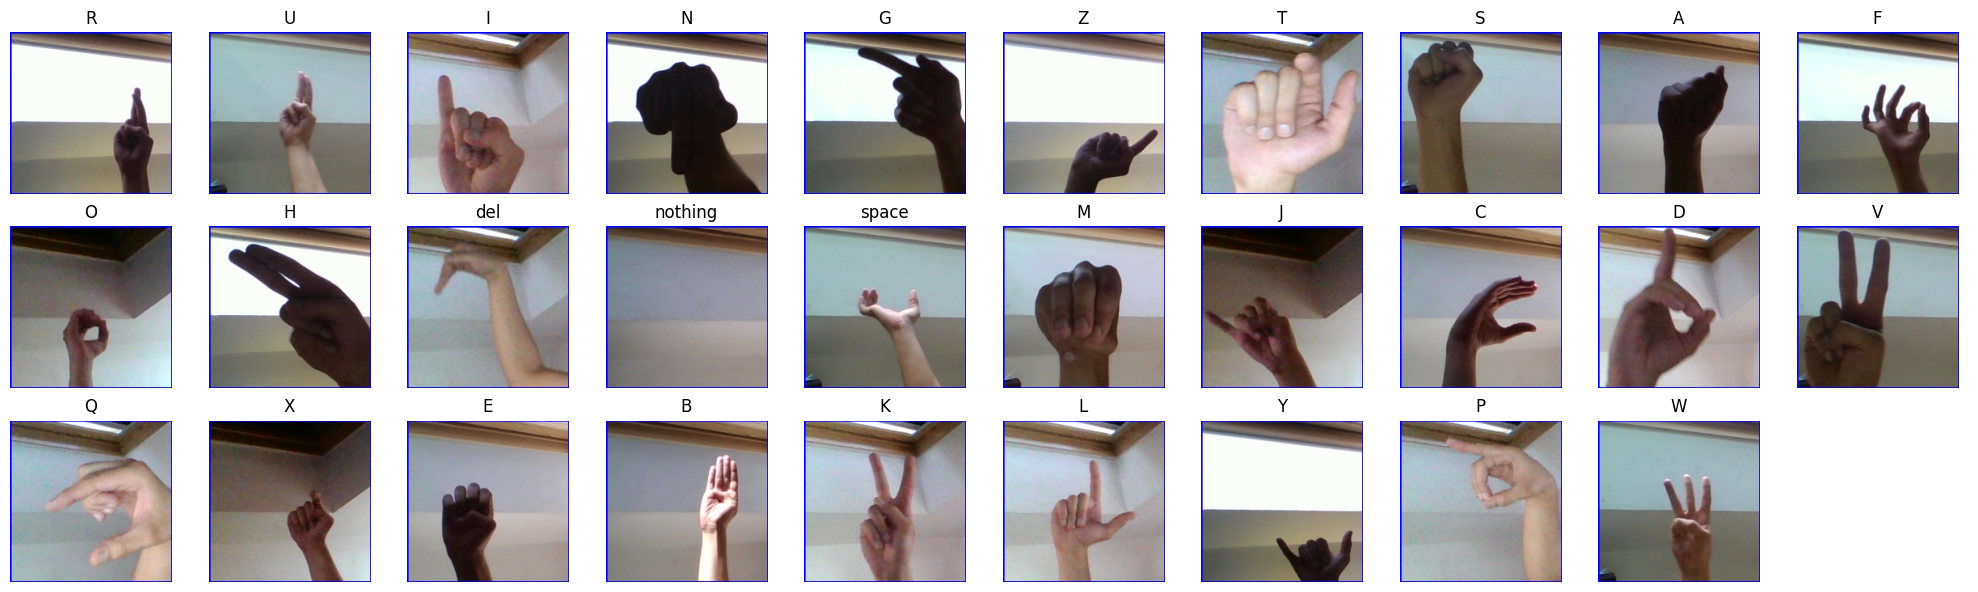

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(20, 6))
axes = axes.ravel()
for i, cls in enumerate(classes[:30]):
    img = Image.open(os.path.join(train_dir, cls, os.listdir(os.path.join(train_dir, cls))[0]))
    axes[i].imshow(img)
    axes[i].set_title(cls)
    axes[i].axis('off')

while i < 30:
    axes[i].set_axis_off()
    i += 1
    
plt.tight_layout()
plt.show()


### Image Properties

In [18]:
# Check image dimensions
image_dims = []
for cls in classes:
    for img_name in os.listdir(os.path.join(train_dir, cls)):
        img = Image.open(os.path.join(train_dir, cls, img_name))
        image_dims.append(img.size)
image_dims = np.array(image_dims)

# Display basic statistics of image dimensions
print("Basic statistics of image dimensions:")
print(f"Width - mean: {np.mean(widths)}, std: {np.std(widths)}, min: {np.min(widths)}, max: {np.max(widths)}")
print(f"Height - mean: {np.mean(heights)}, std: {np.std(heights)}, min: {np.min(heights)}, max: {np.max(heights)}")

# Check if all images have the same dimensions
unique_dims = np.unique(image_dims, axis=0)
if len(unique_dims) == 1:
    print(f"All images have the same dimensions: {unique_dims[0]}")
else:
    # Visualizing image dimensions
    plt.figure(figsize=(12, 6))
    plt.hist(image_dims[:, 0], bins=50, alpha=0.5, label='Width')
    plt.hist(image_dims[:, 1], bins=50, alpha=0.5, label='Height')
    plt.title('Image Dimensions Distribution')
    plt.xlabel('Pixels')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


Basic statistics of image dimensions:
Width - mean: 200.0, std: 0.0, min: 200, max: 200
Height - mean: 200.0, std: 0.0, min: 200, max: 200
All images have the same dimensions: [200 200]


### Image Format Consistency

In [19]:
# Verify image formats
image_formats = []
for cls in classes:
    for img_name in os.listdir(os.path.join(train_dir, cls)):
        img = Image.open(os.path.join(train_dir, cls, img_name))
        image_formats.append(img.format)
image_formats = set(image_formats)
print("Unique image formats:", image_formats)

Unique image formats: {'JPEG'}


### File Size Analysis

Check if there is a significant variance in file sizes, which could indicate potential issues with image quality.

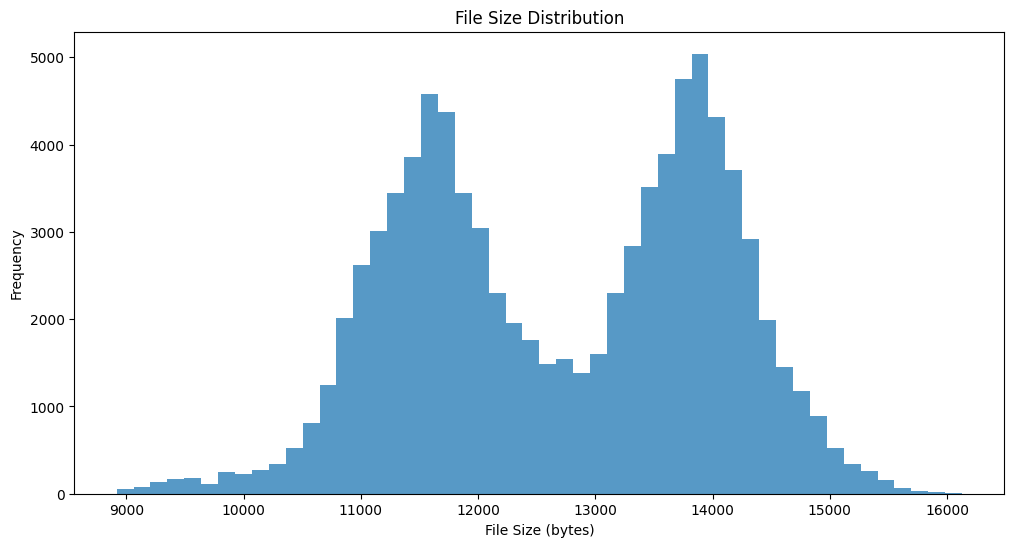

File size - mean: 12714.254931034482, std: 1306.3532998427982, min: 8918, max: 16129


In [27]:
file_sizes = []
for cls in classes:
    for img_name in os.listdir(os.path.join(train_dir, cls)):
        img_path = os.path.join(train_dir, cls, img_name)
        file_sizes.append(os.path.getsize(img_path))
file_sizes = np.array(file_sizes)

plt.figure(figsize=(12, 6))
plt.hist(file_sizes, bins=50, alpha=0.75)
plt.title('File Size Distribution')
plt.xlabel('File Size (bytes)')
plt.ylabel('Frequency')
plt.show()

print(f"File size - mean: {np.mean(file_sizes)}, std: {np.std(file_sizes)}, min: {np.min(file_sizes)}, max: {np.max(file_sizes)}")

### Comparison of File Sizes by Class

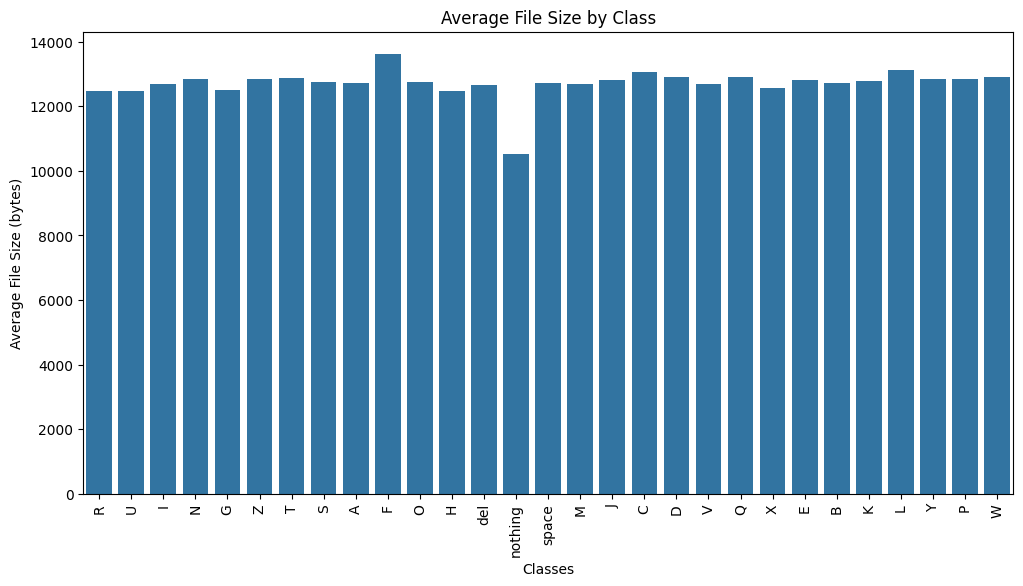

In [21]:
# Calculate average file size by class
avg_file_size_by_class = {cls: np.mean([os.path.getsize(os.path.join(train_dir, cls, img_name)) for img_name in os.listdir(os.path.join(train_dir, cls))]) for cls in classes}

# Plot average file size by class
plt.figure(figsize=(12, 6))
sns.barplot(x=list(avg_file_size_by_class.keys()), y=list(avg_file_size_by_class.values()))
plt.title('Average File Size by Class')
plt.xlabel('Classes')
plt.ylabel('Average File Size (bytes)')
plt.xticks(rotation=90)
plt.show()

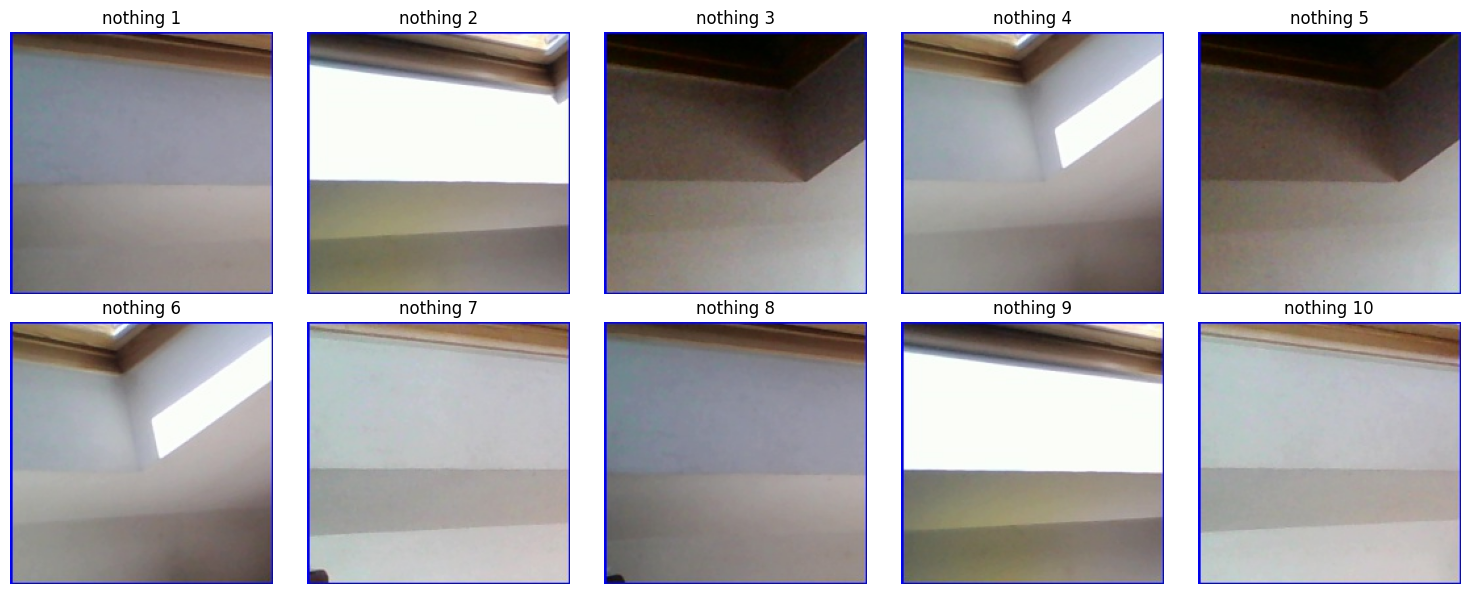

In [23]:
# Display sample images from the "nothing" class
nothing_class_dir = os.path.join(train_dir, 'nothing')
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.ravel()
for i, img_name in enumerate(os.listdir(nothing_class_dir)[:10]):
    img = Image.open(os.path.join(nothing_class_dir, img_name))
    axes[i].imshow(img)
    axes[i].set_title(f"nothing {i+1}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()


### Images with Smallest vs largest file sizes

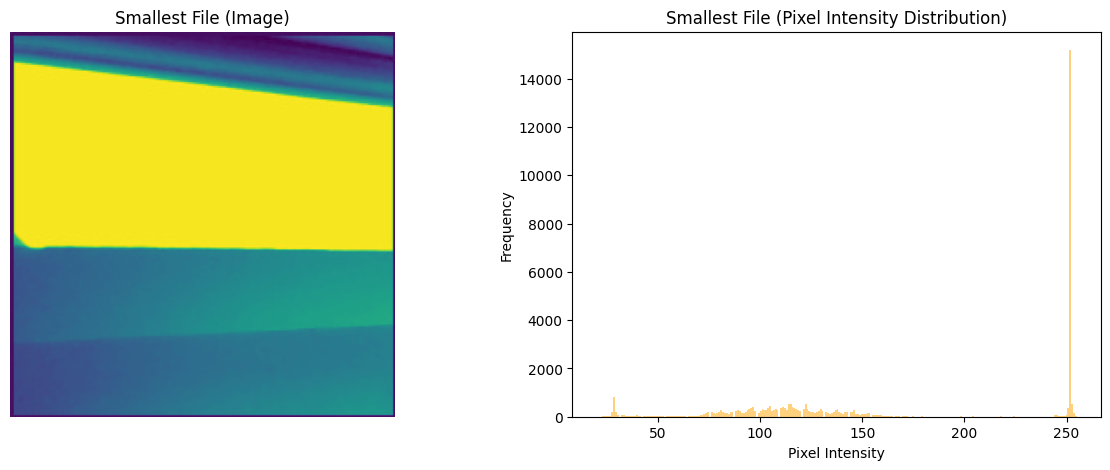

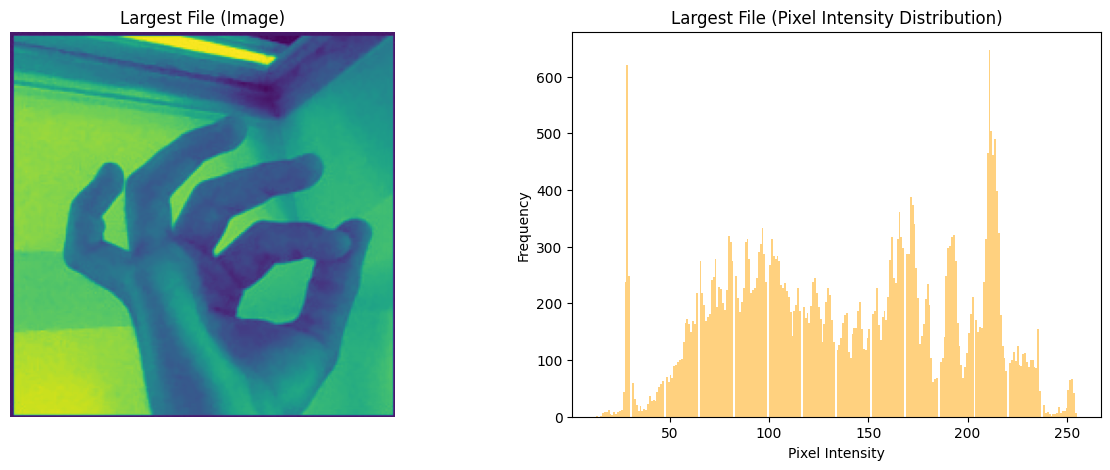

In [32]:
# Function to get paths of images with smallest and largest file sizes
def get_extreme_file_size_images(directory):
    file_sizes = []
    file_paths = []
    for cls in os.listdir(directory):
        class_dir = os.path.join(directory, cls)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            file_size = os.path.getsize(img_path)
            file_sizes.append(file_size)
            file_paths.append(img_path)
    file_sizes = np.array(file_sizes)
    file_paths = np.array(file_paths)
    smallest_file_path = file_paths[file_sizes.argmin()]
    largest_file_path = file_paths[file_sizes.argmax()]
    return smallest_file_path, largest_file_path

# Get paths of images with smallest and largest file sizes
small_img_path, large_img_path = get_extreme_file_size_images(train_dir)

# Function to plot image and pixel intensity histogram side by side
def plot_image_and_histogram(image_path, title):
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot the image
    axes[0].imshow(img)
    axes[0].set_title(f'{title} (Image)')
    axes[0].axis('off')
    
    # Plot the pixel intensity histogram
    axes[1].hist(img_array.ravel(), bins=256, color='orange', alpha=0.5)
    axes[1].set_title(f'{title} (Pixel Intensity Distribution)')
    axes[1].set_xlabel('Pixel Intensity')
    axes[1].set_ylabel('Frequency')
    
    plt.show()

# Plot images and histograms for images of varying file sizes
plot_image_and_histogram(small_img_path, 'Smallest File')
plot_image_and_histogram(large_img_path, 'Largest File')

Smallest File:
* Predominantly uniform background.
* High pixel intensity values (close to 255).
* Simplified content, leading to smaller file size due to efficient compression.
  
Largest File:
* Contains a hand gesture with significant detail and variation.
* Diverse pixel intensity values.
* Complex content, leading to a larger file size due to less efficient compression.

### Overall Summary of Basic Exploration

- **Class Distribution**: Each class has exactly 3000 images, indicating a balanced dataset.
- **Image Dimensions**: All images have uniform dimensions of 200x200 pixels.
- **Image Formats**: All images are in JPEG format.
- **File Size Distribution**: There is a notable bimodal distribution in file sizes, with a mean size of approximately 12714 bytes and a standard deviation of 1306 bytes. The range of file sizes is from 8918 bytes to 16129 bytes.
- **Average File Size by Class**: The "nothing" class has a noticeably lower average file size compared to other classes.
Pixel Intensity Distribution:
    - **Smallest File**: Predominantly high intensity values, suggesting large areas of uniform brightness.
    - **Largest File**: Diverse range of intensity values, indicating more complex content.
- **"Nothing" Class**: Images in the "nothing" class show the background without any hand gestures, making them simpler and more compressible.

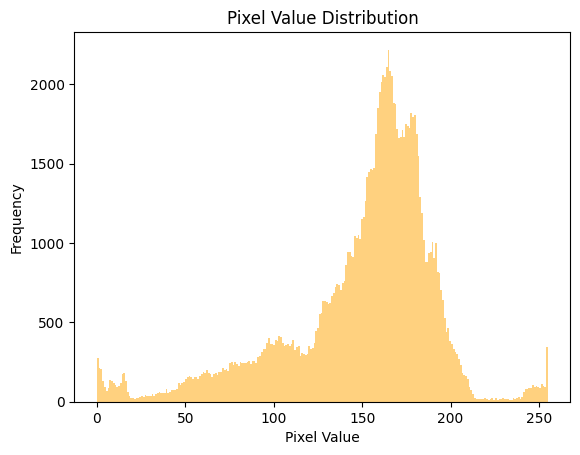

Augmented images for class: A


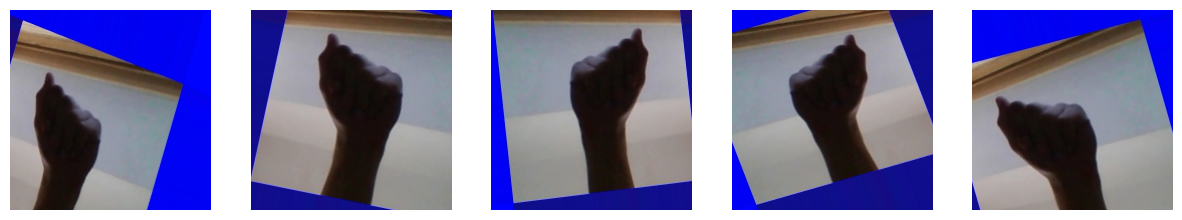

Augmented images for class: B


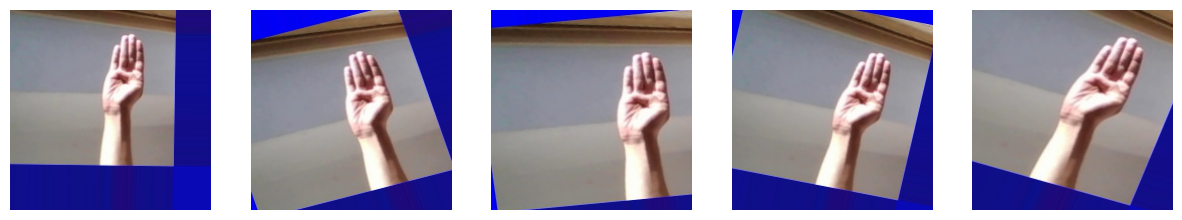

Augmented images for class: C


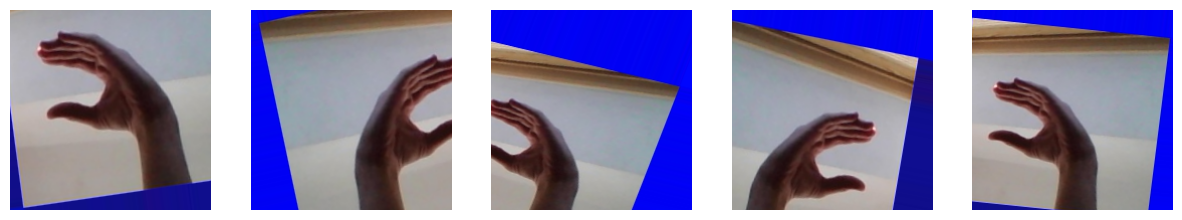

Augmented images for class: D


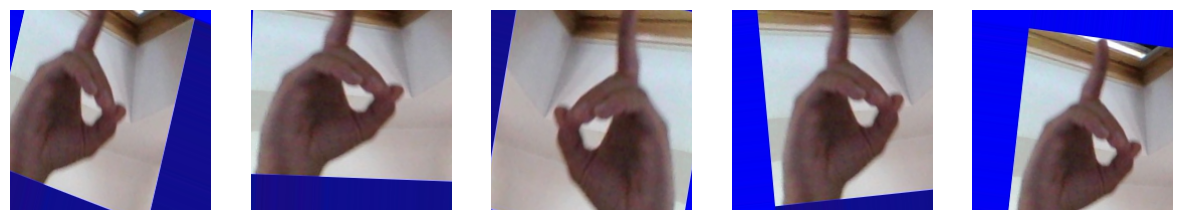

In [27]:
# Function to visualize augmented images for a given class
def visualize_augmentation(class_name, num_samples=5):
    # Load a sample image from the class
    sample_img_path = os.path.join(train_dir, class_name, os.listdir(os.path.join(train_dir, class_name))[0])
    sample_img = Image.open(sample_img_path)
    sample_img = np.array(sample_img)

    # Reshape the image for the ImageDataGenerator
    sample_img = sample_img.reshape((1,) + sample_img.shape)

    # Displaying augmented images
    fig, ax = plt.subplots(1, num_samples, figsize=(15, 15))
    for i, batch in enumerate(datagen.flow(sample_img, batch_size=1)):
        ax[i].imshow(batch[0].astype('uint8'))
        ax[i].axis('off')
        if i + 1 >= num_samples:
            break
    plt.show()

# Visualize augmentation for a few different classes
classes_to_visualize = ['A', 'B', 'C', 'D']  # List of classes to visualize
for class_name in classes_to_visualize:
    print(f"Augmented images for class: {class_name}")
    visualize_augmentation(class_name)


In [5]:
import cv2

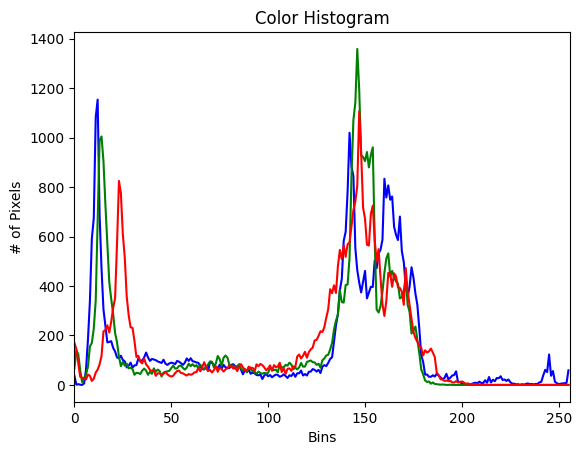

In [7]:

# Function to plot color histograms
def plot_color_histograms(image_path):
    image = cv2.imread(image_path)
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title("Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    features = []
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        features.extend(hist)
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.show()

sample_img_path = os.path.join(train_dir, 'A', os.listdir(os.path.join(train_dir, 'A'))[0])
plot_color_histograms(sample_img_path)


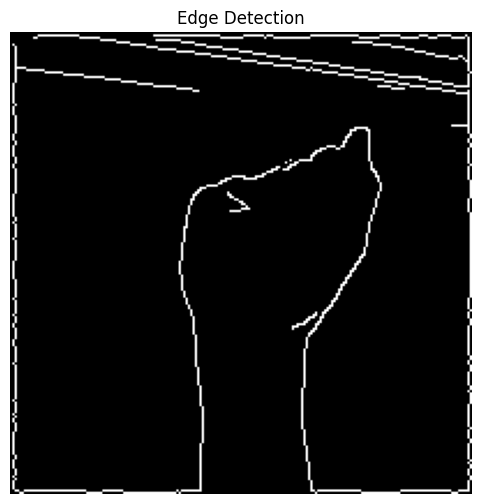

In [8]:
def plot_edges(image_path):
    image = cv2.imread(image_path, 0)
    edges = cv2.Canny(image, 100, 200)
    plt.figure(figsize=(6,6))
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')
    plt.show()

plot_edges(sample_img_path)